In [1]:
# Análise de Dados Aplicada à Produção Vegetal
# Rodolfo Souza - rodolfomssouza@gmail.com
# Aula 3 - Análise exploratória e experimental

In [2]:
# Pacotes -----------------------------------------------------------------
library('fBasics')
library('ExpDes.pt')
library('MASS')

Loading required package: timeDate
Loading required package: timeSeries

Attaching package: ‘MASS’

The following object is masked from ‘package:ExpDes.pt’:

    ginv



In [3]:
# Diretório de trabalho ---------------------------------------------------
setwd('~/')
setwd('Programming/R/Curso_R_PGPV/')

In [4]:
# Dados -------------------------------------------------------------------
dados1 = read.table('GEOR_2016_120_Data.txt', h=T)

# Olhando os dados
head(dados1)

X      Y       ThetaS ThetaAvb PhiMicro PhiMeso PhiMacro Ds   S0     Ks    
1 436550 9106770 0.33   0.106    62.65    11.56   25.79    1.51 0.3288 0.0052
2 436629 9106770 0.35   0.117    56.85    13.35   29.80    1.57 0.4254 0.0075
3 436709 9106752 0.48   0.141    80.11     8.22   11.67    1.39 0.2916 0.0018
4 436790 9106760 0.50   0.124    79.04     7.17   13.79    1.21 0.5414 0.0089
5 436861 9106760 0.49   0.110    79.09     6.48   14.43    1.35 0.2831 0.0035
6 436556 9106676 0.36   0.102    52.34    11.09   36.57    1.57 0.1588 0.0025
  Clay   Silt   Sand   CSC    MSC    FSC    idS    Class
1 0.0721 0.2110 0.7169 0.1207 0.1482 0.4480 0.0218 SaLo 
2 0.0604 0.1876 0.7520 0.1002 0.0965 0.5553 0.0262 SaLo 
3 0.2028 0.3893 0.4079 0.1826 0.0322 0.1931 0.0242 Lo   
4 0.2532 0.3258 0.4210 0.3108 0.0140 0.0962 0.0248 Lo   
5 0.3203 0.3144 0.3653 0.2923 0.0048 0.0682 0.0196 ClLo 
6 0.0669 0.2449 0.6882 0.0652 0.0796 0.5434 0.0244 SaLo

In [5]:
# Estatística descritiva --------------------------------------------------
# Summário dos dados
summary(dados1[3:(length(dados1)-1)])

     ThetaS          ThetaAvb         PhiMicro        PhiMeso      
 Min.   :0.3300   Min.   :0.0580   Min.   :52.34   Min.   : 4.200  
 1st Qu.:0.3950   1st Qu.:0.1070   1st Qu.:65.60   1st Qu.: 6.987  
 Median :0.4600   Median :0.1205   Median :72.52   Median : 8.245  
 Mean   :0.4443   Mean   :0.1215   Mean   :73.16   Mean   : 8.546  
 3rd Qu.:0.4975   3rd Qu.:0.1310   3rd Qu.:79.86   3rd Qu.:10.068  
 Max.   :0.5400   Max.   :0.1930   Max.   :90.07   Max.   :13.350  
    PhiMacro           Ds              S0               Ks          
 Min.   : 4.41   Min.   :1.150   Min.   :0.1584   Min.   :0.001100  
 1st Qu.:12.34   1st Qu.:1.333   1st Qu.:0.2727   1st Qu.:0.002850  
 Median :19.00   Median :1.400   Median :0.3122   Median :0.004750  
 Mean   :18.30   Mean   :1.396   Mean   :0.3827   Mean   :0.005823  
 3rd Qu.:23.89   3rd Qu.:1.450   3rd Qu.:0.4236   3rd Qu.:0.007325  
 Max.   :36.57   Max.   :1.570   Max.   :1.1295   Max.   :0.016800  
      Clay             Silt             S

In [6]:
# Estatística descritiva completa
est = basicStats(dados1[3:(length(dados1)-1)])
round(est, 4)

ThetaS  ThetaAvb PhiMicro  PhiMeso  PhiMacro Ds      S0     
nobs        30.0000 30.0000    30.0000  30.0000  30.0000 30.0000 30.0000
NAs          0.0000  0.0000     0.0000   0.0000   0.0000  0.0000  0.0000
Minimum      0.3300  0.0580    52.3400   4.2000   4.4100  1.1500  0.1584
Maximum      0.5400  0.1930    90.0700  13.3500  36.5700  1.5700  1.1295
1. Quartile  0.3950  0.1070    65.6000   6.9875  12.3425  1.3325  0.2727
3. Quartile  0.4975  0.1310    79.8550  10.0675  23.8950  1.4500  0.4236
Mean         0.4443  0.1215    73.1580   8.5457  18.2963  1.3963  0.3827
Median       0.4600  0.1205    72.5200   8.2450  18.9950  1.4000  0.3122
Sum         13.3300  3.6440  2194.7400 256.3700 548.8900 41.8900 11.4807
SE Mean      0.0111  0.0047     1.8534   0.4167   1.4952  0.0179  0.0377
LCL Mean     0.4216  0.1119    69.3674   7.6935  15.2383  1.3597  0.3057
UCL Mean     0.4671  0.1310    76.9486   9.3979  21.3544  1.4330  0.4597
Variance     0.0037  0.0007   103.0524   5.2086  67.0700  0.0096  0.0425
Stdev        0.0610  0.0256    10.1515   2.2822   8.1896  0.0981  0.2062
Skewness    -0.4387  0.3556    -0.0766   0.2558   0.0798 -0.3063  1.9779
Kurtosis    -1.1757  1.1299    -0.9565  -0.6710  -0.7939 -0.1929  4.1192
            Ks      Clay    Silt    Sand    CSC     MSC     FSC     idS    
nobs        30.0000 30.0000 30.0000 30.0000 30.0000 30.0000 30.0000 30.0000
NAs          0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
Minimum      0.0011  0.0604  0.1876  0.2319  0.0242  0.0034  0.0270  0.0119
Maximum      0.0168  0.4187  0.4361  0.7520  0.4713  0.1482  0.5553  0.0365
1. Quartile  0.0028  0.1429  0.3048  0.3763  0.1841  0.0128  0.0966  0.0211
3. Quartile  0.0073  0.2645  0.4004  0.5017  0.2871  0.0250  0.2272  0.0254
Mean         0.0058  0.2005  0.3424  0.4571  0.2347  0.0282  0.1942  0.0235
Median       0.0048  0.2011  0.3482  0.4308  0.2422  0.0160  0.1502  0.0235
Sum          0.1747  6.0144 10.2731 13.7125  7.0412  0.8446  5.8268  0.7063
SE Mean      0.0008  0.0167  0.0126  0.0223  0.0183  0.0059  0.0256  0.0010
LCL Mean     0.0043  0.1663  0.3166  0.4115  0.1974  0.0161  0.1418  0.0215
UCL Mean     0.0074  0.2346  0.3682  0.5026  0.2720  0.0402  0.2466  0.0256
Variance     0.0000  0.0084  0.0048  0.0149  0.0100  0.0010  0.0197  0.0000
Stdev        0.0041  0.0915  0.0691  0.1220  0.1000  0.0322  0.1403  0.0055
Skewness     1.1781  0.2910 -0.4792  0.6844  0.0465  2.2263  1.1839  0.2557
Kurtosis     0.5247 -0.5504 -0.8536  0.0132 -0.2160  4.5680  0.4798  0.3255

In [7]:
# Teste de normalidade
# Kolmogorov-Smirnov
ks.test(dados1$Ks, 'pnorm', mean=mean(dados1$Ks), sd=sd(dados1$Ks))

Warning message in ks.test(dados1$Ks, "pnorm", mean = mean(dados1$Ks), sd = sd(dados1$Ks)):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  dados1$Ks
D = 0.15988, p-value = 0.4271
alternative hypothesis: two-sided


In [8]:
# Rodando o teste em loop para todas as variáveis
valorp = NA
interp = NA
for(i in 3:17){
    valorp[i-2] = ks.test(dados1[,i], 'pnorm',
                        mean=mean(dados1[,i]),
                        sd=sd(dados1[,i]))$p.value
    if(valorp[i-2]>=0.05){interp[i-2]='Normal 5 %'}
    else if(valorp[i-2]<0.05 & valorp[i-2]>=0.01){interp[i-2]='Normal 1 %'}
    else{interp[i-2]='Nao normal'}
}


Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), sd = sd(dados1[, :
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(dados1[, i], "pnorm", mean = mean(dados1[, i]), s

In [9]:
# Adicionando resultado do teste de normalidade na estatística descritiva
est[17,] = round(valorp, 4)
n1 = rownames(est)
n1[17] = 'ValorP-KS'
rownames(est) = n1

In [10]:
# Salvando resultados da estatítica descritiva
write.csv(x = est, file = 'Estatistica_descritiva.csv')

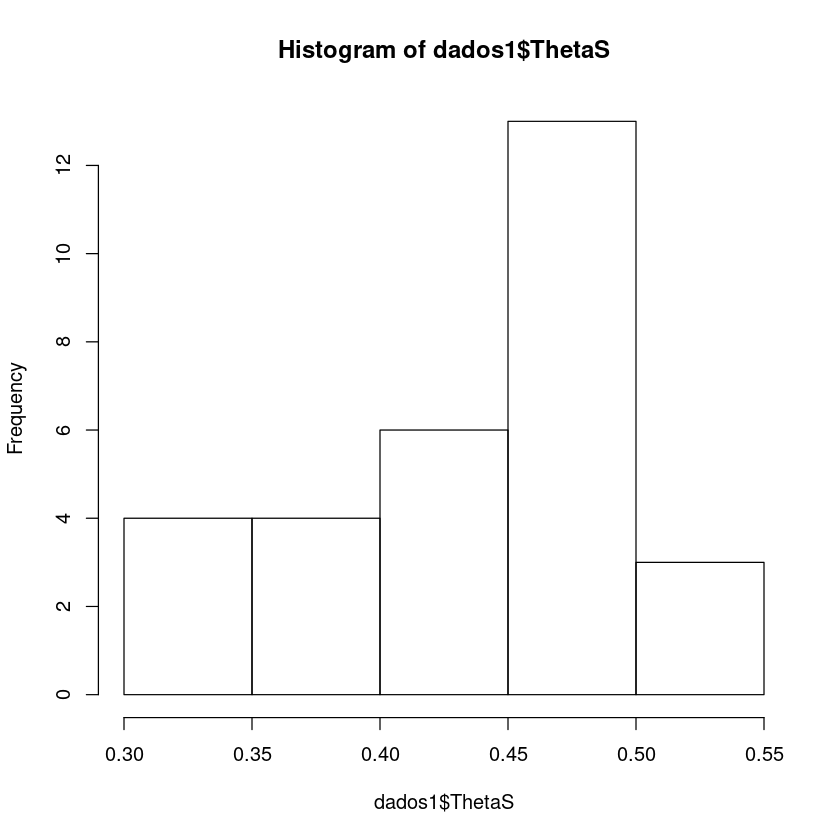

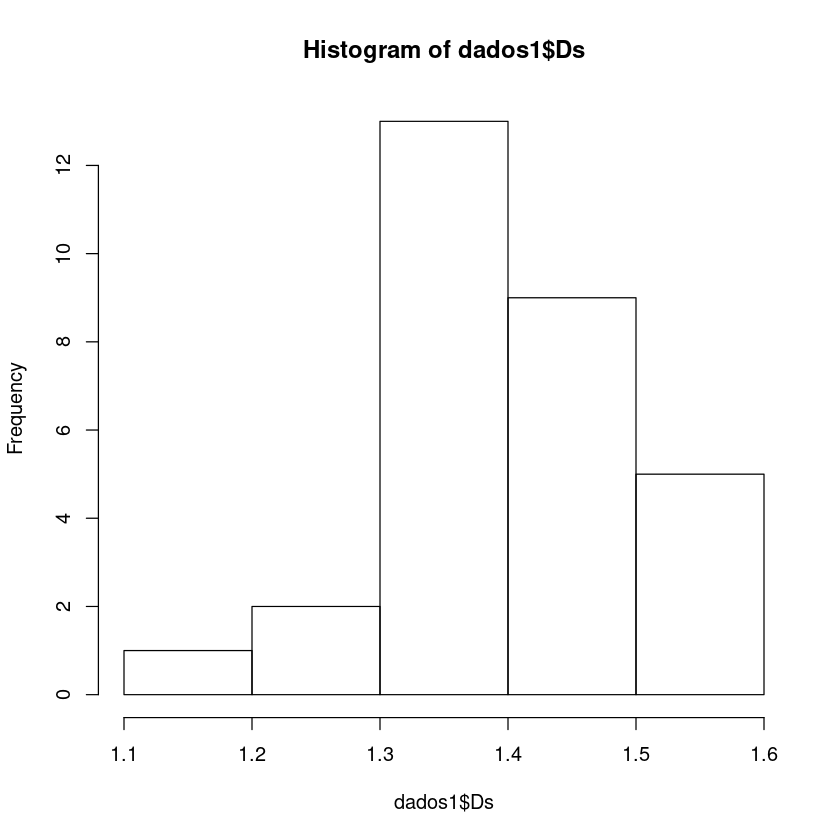

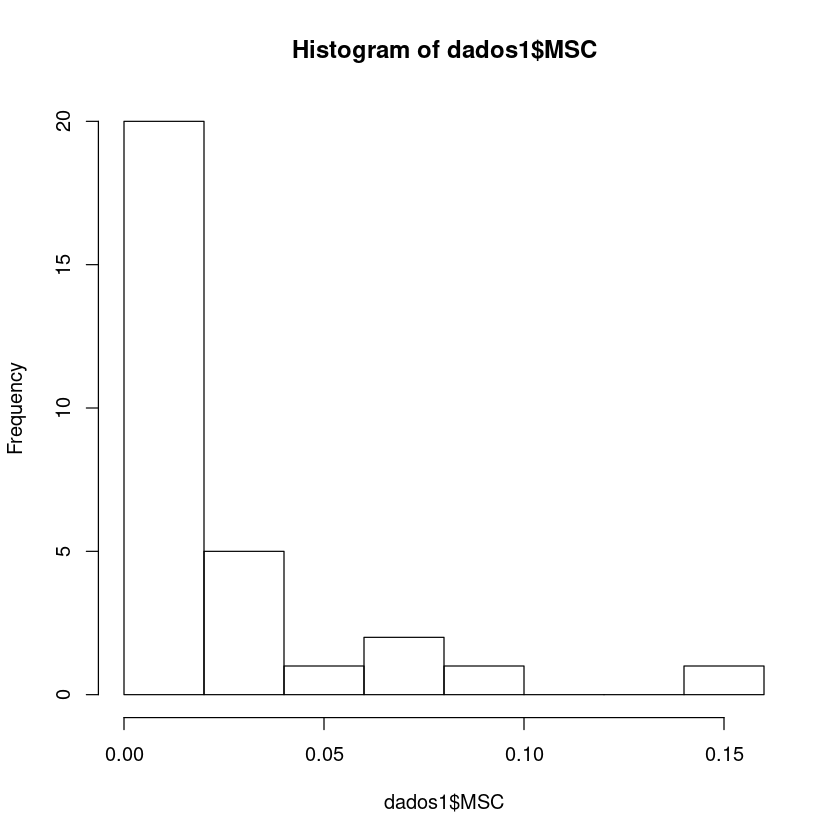

In [11]:
# Histogramas
hist(dados1$ThetaS)
hist(dados1$Ds)
hist(dados1$MSC)

In [12]:
# Estatística experimental ------------------------------------------------
# Dados do pacote ExpDes.pt
data(ex5)

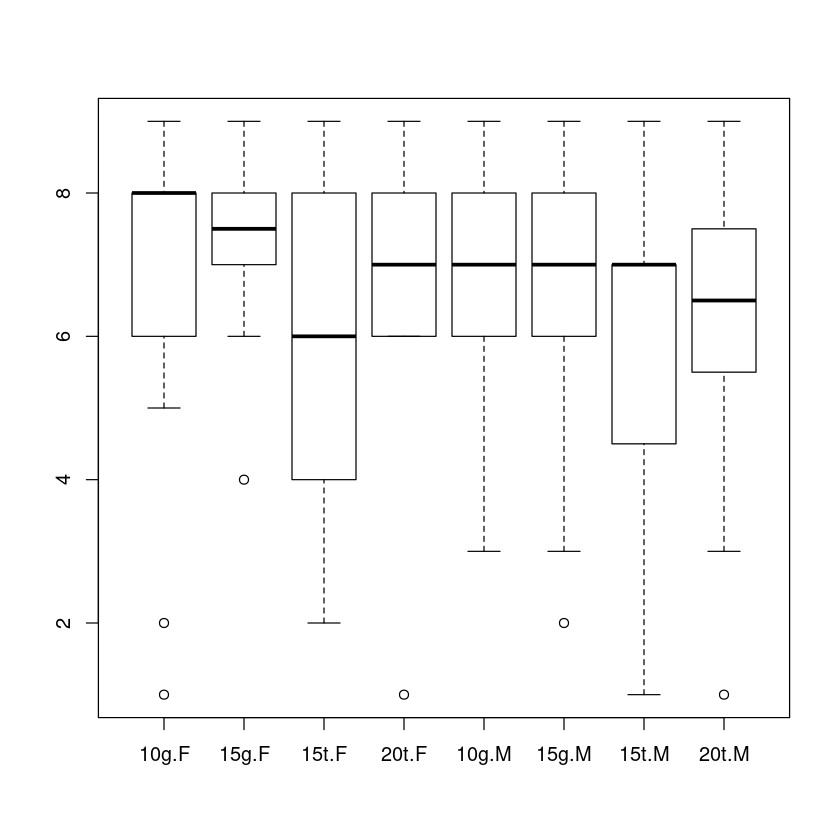

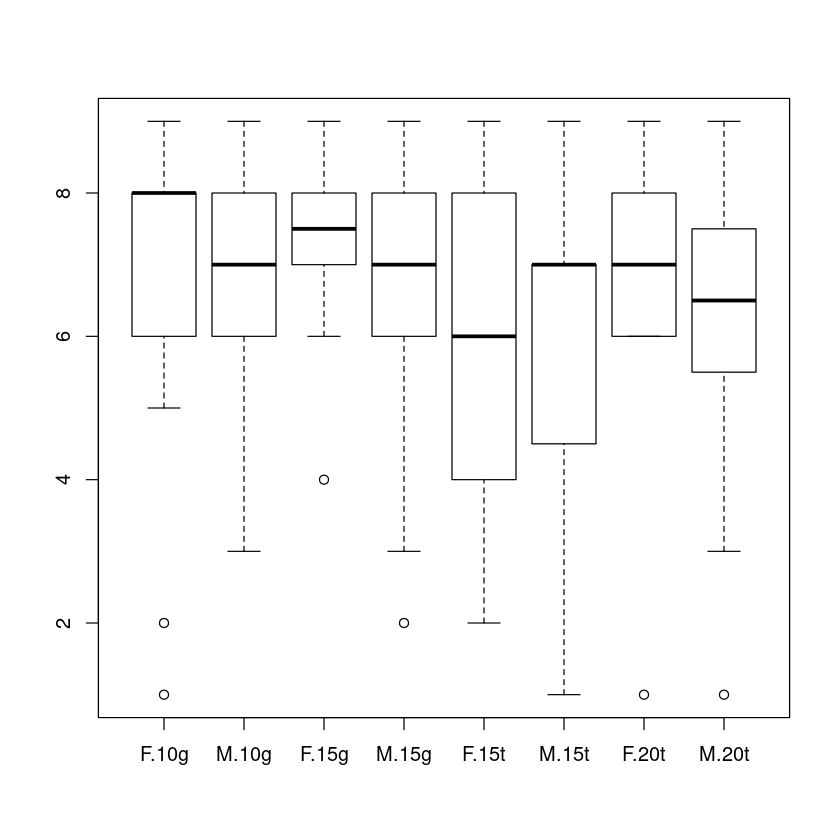

In [13]:
# Boxplot
with(ex5, boxplot(sabor~(trat+genero)))
with(ex5, boxplot(sabor~(genero+trat)))

In [14]:
# Análise fatorial duplo
fat2.dbc(fator1=ex5$trat, fator2=ex5$genero,
         bloco=ex5$bloco, resp=ex5$sabor,
         fac.names=c('Trat', 'Genero'))

------------------------------------------------------------------------
Legenda:
FATOR 1:  Trat 
FATOR 2:  Genero 
------------------------------------------------------------------------


Quadro da analise de variancia
------------------------------------------------------------------------
             GL     SQ     QM      Fc   Pr>Fc
Bloco        19  97.82 5.1484 1.55116 0.07832
Trat          3  19.37 6.4563 1.94522 0.12537
Genero        1   7.66 7.6563 2.30677 0.13118
Trat*Genero   3   3.92 1.3062 0.39356 0.75783
Residuo     133 441.43 3.3190                
Total       159 570.19                       
------------------------------------------------------------------------
CV = 27.58 %

------------------------------------------------------------------------
Teste de normalidade dos residuos (Shapiro-Wilk)
p-valor:  0.005428379 
ATENCAO: a 5% de significancia, os residuos nao podem ser considerados normais!
-----------------------------------------------------------------------

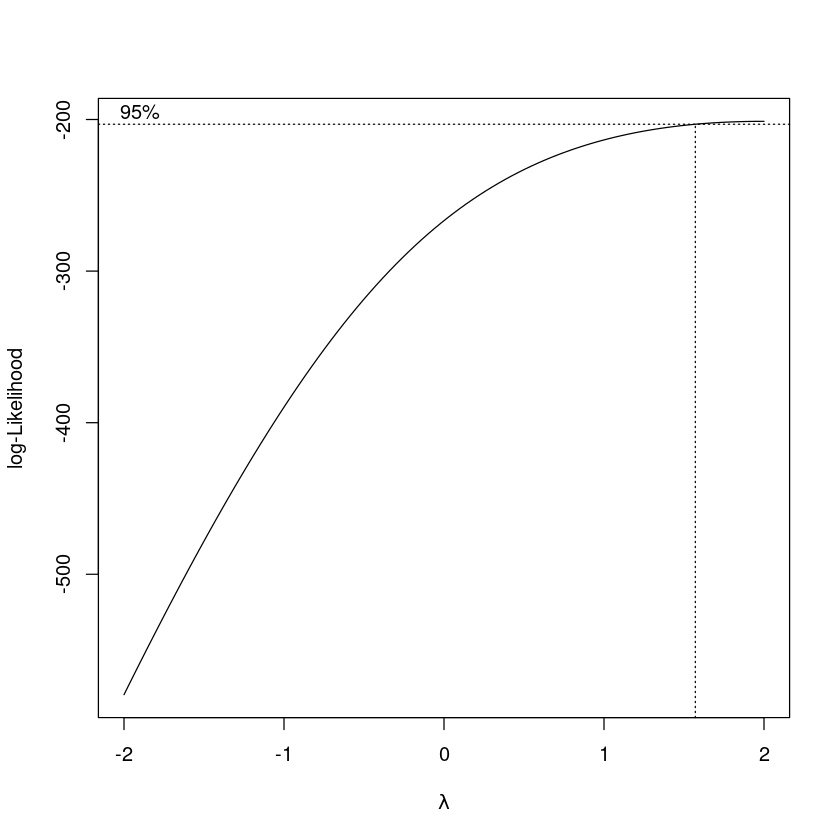

In [15]:
# Usando BoxCox para tentar nornalizar
boxcox(ex5$sabor~ex5$trat)

In [16]:
# Elevar o valor da varíavel à 1.557
lbd = 1.557

fat2.dbc(fator1=ex5$trat, fator2=ex5$genero,
         bloco=ex5$bloco, resp=ex5$sabor^lbd,
         fac.names=c('Trat', 'Genero'))

------------------------------------------------------------------------
Legenda:
FATOR 1:  Trat 
FATOR 2:  Genero 
------------------------------------------------------------------------


Quadro da analise de variancia
------------------------------------------------------------------------
             GL     SQ      QM     Fc   Pr>Fc
Bloco        19 1527.9  80.416 1.4827 0.10145
Trat          3  323.9 107.964 1.9907 0.11844
Genero        1  146.1 146.082 2.6935 0.10312
Trat*Genero   3   55.8  18.586 0.3427 0.79448
Residuo     133 7213.2  54.235               
Total       159 9266.8                       
------------------------------------------------------------------------
CV = 37.52 %

------------------------------------------------------------------------
Teste de normalidade dos residuos (Shapiro-Wilk)
p-valor:  0.1474602 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------

In [17]:
# Experimento em DBC
data(ex2)
# head(ex2)

dbc(trat = ex2$trat, bloco = ex2$provador, resp = ex2$aparencia)

------------------------------------------------------------------------
Quadro da analise de variancia
------------------------------------------------------------------------
            GL      SQ      QM     Fc      Pr>Fc
Tratamento   4  720.38 180.096 71.156 0.00000000
Bloco       69  324.00   4.696  1.855 0.00025852
Residuo    276  698.55   2.531                  
Total      349 1742.94                          
------------------------------------------------------------------------
CV = 29.14 %

------------------------------------------------------------------------
Teste de normalidade dos residuos (Shapiro-Wilk)
p-valor:  0.617668 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------------------------------

Teste de Tukey
------------------------------------------------------------------------
Grupos Tratamentos Medias
a 	 D 	 6.657143 
a 	 E 	 6.6 
a 	 C 	 6.271429 
 b 	 B 